# read image directory

In [1]:
import face_recognition
import os

img_path = os.getenv("HOME") +"/github/aiffel_practice/EXPLORATION07/images"
file_list = os.listdir(img_path)
print(file_list)

['my_img.jpg', 'jongmin.png', 'junha.png', 'my_img3.jpg', 'jaeseok.png', 'myoungsu.png', 'hodong.png', 'my_img4.jpg', 'doni.png', 'hongcheol.png', 'my_img2.jpg']


# define some functions to get list of images(my, other, total)

In [2]:
def get_my_img_list(file_list):
    my_img_lst = []
    for img_name in file_list:
        if img_name.startswith("my_img"):
            my_img_lst.append(img_name)
    print(my_img_lst)
    return my_img_lst

def get_other_img_list(file_list):
    img_lst = []
    for img_name in file_list:
        if not img_name.startswith("my_img"):
            img_lst.append(img_name)
    print(img_lst)
    return img_lst

def get_img_list(file_list):
    img_lst = []
    my_imgs = ['my_img3.jpg', 'my_img4.jpg', 'my_img2.jpg']
    for img_name in file_list:
        if img_name in my_imgs: continue
        img_lst.append(img_name)
    print(img_lst)
    return img_lst

my_img_lst = get_my_img_list(file_list)
other_img_lst = get_other_img_list(file_list)
img_lst = get_img_list(file_list)

['my_img.jpg', 'my_img3.jpg', 'my_img4.jpg', 'my_img2.jpg']
['jongmin.png', 'junha.png', 'jaeseok.png', 'myoungsu.png', 'hodong.png', 'doni.png', 'hongcheol.png']
['my_img.jpg', 'jongmin.png', 'junha.png', 'jaeseok.png', 'myoungsu.png', 'hodong.png', 'doni.png', 'hongcheol.png']


# define face crop function

In [3]:
def get_cropped_face(img_file_path):
    img = face_recognition.load_image_file(img_file_path)
    face_locations = face_recognition.face_locations(img)
    top, right, bottom, left = face_locations[0]
    cropped_face = img[top:bottom, left:right, :]
    return cropped_face

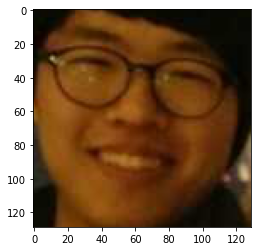

In [4]:
import matplotlib.pyplot as plt
import random

my_img_path = img_path + "/"+ random.choice(my_img_lst)
cropped_face = get_cropped_face(my_img_path)
plt.imshow(cropped_face)

# convert face2embedvec

In [5]:
def get_face_embeding(cropped_face):
    return face_recognition.face_encodings(cropped_face)

In [6]:
embedding = get_face_embeding(cropped_face)
print(len(embedding))
print(len(embedding[0]))
print(embedding[0][:20])
print(type(embedding[0]))

1
128
[-0.11550993  0.11017134  0.03840223 -0.01461394 -0.0653789  -0.03785222
 -0.0478765  -0.16658533  0.13228391 -0.14173789  0.25765568 -0.05860135
 -0.20626755 -0.15543114 -0.10643319  0.17534819 -0.18238141 -0.11736527
 -0.02756316  0.00306041]
<class 'numpy.ndarray'>


# get dictionary with name and vector

In [7]:
def get_face_embedding_dict(dir_path, file_lst):
    embedding_dict = {}
    for file in file_lst:
        img_file_path = os.path.join(dir_path, file)
        file_name = file.split(".")[0]
        #print(img_file)
        cropped_img = get_cropped_face(img_file_path)
        embed = get_face_embeding(cropped_img)
        if len(embed) == 0: continue
        embedding_dict[file_name] = embed[0]
    return embedding_dict

In [8]:
my_embed_dict = get_face_embedding_dict(img_path, my_img_lst)

In [9]:
print(my_embed_dict.keys())
print(my_embed_dict["my_img"][:10])
print(my_embed_dict["my_img2"][:10])

dict_keys(['my_img', 'my_img3', 'my_img4', 'my_img2'])
[-0.10196567  0.07996795  0.05759083 -0.02018109 -0.07439067 -0.03228232
 -0.09658205 -0.1218228   0.06859756 -0.08673687]
[-0.07428897  0.09770338  0.04289492 -0.00786687 -0.08763178 -0.00352474
 -0.07093649 -0.1160585   0.0798023  -0.09407141]


# define to get L2 distance(+ with embed dict)

In [10]:
import numpy as np
def get_distance(A, B, ord=2):
    return np.linalg.norm(A - B, ord=ord)
def get_distance_dict(embed_dict, name1, name2, ord=2):
    return get_distance(embed_dict[name1], embed_dict[name2], ord=ord)

# Comparision L2 distance with my pictures

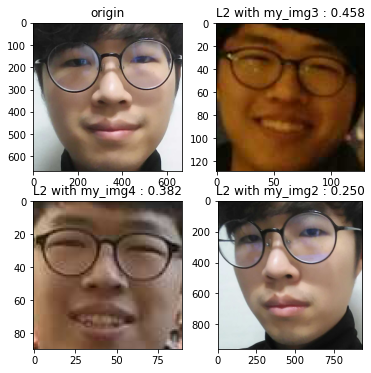

In [11]:
plt.figure(figsize=(6, 6))
for i, (key, item) in enumerate(my_embed_dict.items()):
    if i == 0:
        plt.subplot(2,2,1)
        plt.imshow(get_cropped_face(img_path+"/"+key+".jpg"))
        plt.title("origin")
    else:
        plt.subplot(2,2,1+ i)
        plt.imshow(get_cropped_face(img_path+"/"+key +".jpg"))
        plt.title("L2 with "+ key +" : {:0.3f}".format(get_distance_dict(my_embed_dict, "my_img", key)))

# get total embed dict and l2 distances with my picture

In [12]:
embed_dict = get_face_embedding_dict(img_path, img_lst)
print(embed_dict.keys())
print(embed_dict["my_img"][:10])

dict_keys(['my_img', 'jongmin', 'junha', 'jaeseok', 'myoungsu', 'hodong', 'hongcheol'])
[-0.10196567  0.07996795  0.05759083 -0.02018109 -0.07439067 -0.03228232
 -0.09658205 -0.1218228   0.06859756 -0.08673687]


In [15]:
name1 = "my_img"
names = ["hodong", "hongcheol", "junha", "jaeseok","jongmin"]

for name2 in names:
    print("L2 distance between ",name1," and ",name2," : ",
          get_distance_dict(embed_dict, name1, name2))

L2 distance between  my_img  and  hodong  :  0.601899443760559
L2 distance between  my_img  and  hongcheol  :  0.5444969152020505
L2 distance between  my_img  and  junha  :  0.5639229328505465
L2 distance between  my_img  and  jaeseok  :  0.458825844779992
L2 distance between  my_img  and  jongmin  :  0.5478047107337394


# let's find similar celebrity with me

In [16]:
def get_sort_key_func(embed_dict, name1):
    def get_distance_from_name1(name2):
        return get_distance_dict(embed_dict, name1, name2)
    return get_distance_from_name1

In [17]:
def get_nearest_face(name, embed_dict, top=5):
    nearest_lst = []
    sort_key_func = get_sort_key_func(embed_dict, name)
    sort_lst = sorted(embed_dict.items(), key=lambda x: sort_key_func(x[0]))
    for idx, (key, item) in enumerate(sort_lst):
        if idx == 0:
            continue
        if idx == 1:
            print("the most similary person with "+name+" is ", key, 
                  ", L2 distance : {:0.3f}".format(get_distance(embed_dict[name], item)))
        else:
            print("L2 distance between ",name," and ",key,
                  " : {:0.3f}".format(get_distance(embed_dict[name], item)))
        nearest_lst.append(key)
        if idx == top: break
    return nearest_lst

In [18]:
nearest_lst = get_nearest_face("my_img", embed_dict)

the most similary person with my_img is  jaeseok , L2 distance : 0.459
L2 distance between  my_img  and  myoungsu  : 0.483
L2 distance between  my_img  and  hongcheol  : 0.544
L2 distance between  my_img  and  jongmin  : 0.548
L2 distance between  my_img  and  junha  : 0.564


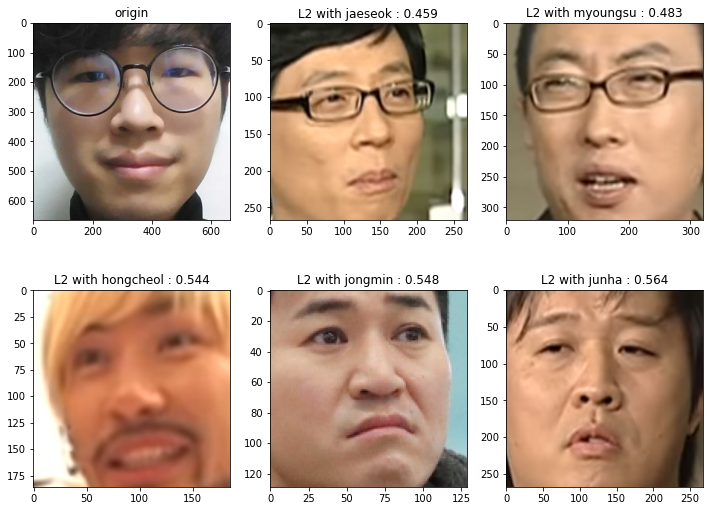

In [21]:
plt.figure(figsize=(12,9))
plt.subplot(2, 3, 1)
plt.imshow(get_cropped_face(img_path+"/"+"my_img.jpg"))
plt.title("origin")

for i, key in enumerate(nearest_lst):
    plt.subplot(2,3,2+ i)
    plt.imshow(get_cropped_face(img_path+"/"+key +".png"))
    plt.title("L2 with "+ key +" : {:0.3f}".format(get_distance_dict(embed_dict, "my_img", key)))